In [15]:
#warnings
import warnings
warnings.filterwarnings('ignore')

In [16]:
import numpy as np
import pandas as pd

# data visuzlization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [17]:
# max columns
pd.set_option('display.max_columns', None)
# max rows
pd.set_option('display.max_rows', None)

In [18]:
df = pd.read_csv('diabetic_data.csv')
df.replace('?',np.nan,inplace=True)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [19]:
m=pd.DataFrame({'Number of Missing':df.isnull().sum() , 'Missing Percentage':np.round(df.isnull().sum()*100/len(df),1)})
m=m[m['Missing Percentage']>0]
m

,Number of Missing,Missing Percentage
race,2273,2.2
weight,98569,96.9
payer_code,40256,39.6
medical_specialty,49949,49.1
diag_2,358,0.4
diag_3,1423,1.4


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non

In [21]:
df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [22]:
#dropping columns with high NA percentage
df.drop(['weight','medical_specialty','payer_code'],axis=1,inplace=True)
# dropping columns related to IDs
df.drop(['encounter_id','patient_nbr','admission_type_id',
         'discharge_disposition_id','admission_source_id'],axis=1,inplace=True)
#removing invalid/unknown entries for gender
df=df[df['gender']!='Unknown/Invalid']
# dropping rows with NAs.
df.dropna(inplace=True)

In [23]:
m=pd.DataFrame({'Number of Missing':df.isnull().sum() , 'Missing Percentage':np.round(df.isnull().sum()*100/len(df),1)})
m=m[m['Missing Percentage']>0]
m

,Number of Missing,Missing Percentage


In [24]:
df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


In [11]:
diag_cols = ['diag_1','diag_2','diag_3']
for col in diag_cols:
    df[col] = df[col].str.replace('E','-')
    df[col] = df[col].str.replace('V','-')
    condition = df[col].str.contains('250')
    #print(condition)
    df.loc[condition,col] = '250'
    #print(df.loc[condition,col])
    print(df[col].value_counts().T)

250     7965
428     6730
414     6373
786     3900
410     3514
486     3412
427     2701
491     2210
715     2073
434     1983
780     1976
682     1966
996     1926
276     1831
38      1642
599     1557
584     1496
-57     1179
518     1092
820     1034
577     1017
493     1010
435      987
562      957
574      937
560      850
296      842
440      817
433      768
998      752
722      703
578      643
507      595
789      545
453      530
530      521
8        500
403      497
402      445
535      445
415      436
295      428
162      419
458      418
724      417
997      414
285      362
733      352
278      343
401      336
592      332
482      331
558      330
590      326
197      314
280      311
153      305
824      300
569      281
426      278
571      269
531      268
511      264
787      259
404      258
648      255
707      250
411      238
198      236
572      235
466      232
552      226
-58      223
730      222
812      220
532      213
575      210

250     11862
428      6517
276      6513
427      4919
401      3613
496      3233
599      3225
403      2781
414      2574
411      2495
707      1922
585      1830
584      1631
491      1513
285      1481
780      1446
425      1411
682      1391
486      1348
518      1326
424      1051
413      1006
493       857
305       675
786       631
280       591
998       551
410       535
511       506
785       501
38        464
996       441
571       408
-45       403
272       401
197       399
162       398
440       394
295       393
577       393
560       389
788       374
41        372
997       369
578       340
453       340
574       337
789       336
648       331
402       327
198       315
799       306
287       301
426       293
303       282
530       276
70        263
278       261
-42       261
438       251
730       239
591       229
790       220
342       219
492       216
196       209
787       199
404       196
536       195
112       193
535       191
8     

250       16695
401        8089
276        5097
428        4491
427        3865
414        3567
496        2552
403        2322
585        1949
272        1910
599        1906
-45        1372
707        1342
780        1310
285        1175
425        1118
424        1034
584         941
305         904
682         861
518         831
41          711
493         675
278         670
530         606
786         573
491         565
486         552
244         524
-58         498
411         389
280         388
287         385
197         380
785         377
357         374
511         374
402         370
787         352
788         336
412         334
593         329
-15         328
413         324
998         312
294         308
571         307
438         307
560         302
799         301
295         298
997         290
995         288
789         284
535         283
458         281
996         275
70          273
426         270
536         265
263         248
578         242
-42     

In [12]:
df[diag_cols] = df[diag_cols].astype(float)

# diagnosis grouping
for col in diag_cols:
    df['temp']=np.nan
    
    condition = df[col]==250
    df.loc[condition,'temp']='Diabetes'
    
    condition = (df[col]>=390) & (df[col]<=458) | (df[col]==785)
    df.loc[condition,'temp']='Circulatory'
    
    condition = (df[col]>=460) & (df[col]<=519) | (df[col]==786)
    df.loc[condition,'temp']='Respiratory'
    
    condition = (df[col]>=520) & (df[col]<=579) | (df[col]==787)
    df.loc[condition,'temp']='Digestive'
    
    condition = (df[col]>=580) & (df[col]<=629) | (df[col]==788)
    df.loc[condition,'temp']='Genitourinary'
    
    condition = (df[col]>=800) & (df[col]<=999)
    df.loc[condition,'temp']='Injury'
    
    condition = (df[col]>=710) & (df[col]<=739)
    df.loc[condition,'temp']='Muscoloskeletal'
    
    condition = (df[col]>=140) & (df[col]<=239)
    df.loc[condition,'temp']='Neoplasms'
    
    condition = df[col]==0
    df.loc[condition,col]='?'
    df['temp']=df['temp'].fillna('Others')
    condition = df['temp']=='0'
    df.loc[condition,'temp']=np.nan
    df[col]=df['temp']
    df.drop('temp',axis=1,inplace=True)
    
df.dropna(inplace=True)    

In [13]:
df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,Others,Diabetes,Others,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,Others,Diabetes,Others,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),2,44,1,16,0,0,0,Others,Diabetes,Circulatory,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),3,31,6,16,0,0,0,Circulatory,Circulatory,Diabetes,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


In [14]:
# https://www.statcan.gc.ca/eng/concepts/definitions/age2


df['age'].value_counts()

[70-80)     25305
[60-70)     21809
[80-90)     16702
[50-60)     16697
[40-50)      9265
[30-40)      3548
[90-100)     2717
[20-30)      1478
[10-20)       466
[0-10)         65
Name: age, dtype: int64

### <20 Child
### 20 - 60 Adult
### 60> Seniors

In [15]:
df['age']=df['age'].replace({'[0-10)':'child','[10-20)':'child','[20-30)':'adult','[30-40)':'adult','[40-50)':'adult','[50-60)':'adult'
                   ,'[60-70)':'Seniors','[70-80)':'Seniors','[80-90)':'Seniors','[90-100)':'Seniors'})

In [16]:
df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,child,3,59,0,18,0,0,0,Others,Diabetes,Others,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,adult,2,11,5,13,2,0,1,Others,Diabetes,Others,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,adult,2,44,1,16,0,0,0,Others,Diabetes,Circulatory,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,adult,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,adult,3,31,6,16,0,0,0,Circulatory,Circulatory,Diabetes,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


In [17]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [18]:
num_cols = df.select_dtypes(exclude='object').columns
num_cols

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')

In [19]:
for i in cat_cols:
  print(i)
  print(df[i].value_counts())
  print('---'*20)

race
Caucasian          75079
AfricanAmerican    18881
Hispanic            1984
Other               1483
Asian                625
Name: race, dtype: int64
------------------------------------------------------------
gender
Female    52833
Male      45219
Name: gender, dtype: int64
------------------------------------------------------------
age
Seniors    66533
adult      30988
child        531
Name: age, dtype: int64
------------------------------------------------------------
diag_1
Circulatory        29536
Others             17634
Respiratory        13993
Digestive           9187
Diabetes            7965
Injury              6703
Genitourinary       4983
Muscoloskeletal     4739
Neoplasms           3312
Name: diag_1, dtype: int64
------------------------------------------------------------
diag_2
Circulatory        31052
Others             25718
Diabetes           11862
Respiratory        10637
Genitourinary       8203
Digestive           4049
Neoplasms           2493
Injury         

In [20]:
df=df.drop(['acetohexamide','troglitazone','examide','citoglipton','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','glipizide-metformin','glipizide-metformin'],axis=1)

In [21]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'tolazamide', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed',
       'readmitted'],
      dtype='object')

In [22]:
num_cols = df.select_dtypes(exclude='object').columns
num_cols

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')

In [23]:
for i in cat_cols:
  print(i)
  print(df[i].value_counts())
  print('---'*20)

race
Caucasian          75079
AfricanAmerican    18881
Hispanic            1984
Other               1483
Asian                625
Name: race, dtype: int64
------------------------------------------------------------
gender
Female    52833
Male      45219
Name: gender, dtype: int64
------------------------------------------------------------
age
Seniors    66533
adult      30988
child        531
Name: age, dtype: int64
------------------------------------------------------------
diag_1
Circulatory        29536
Others             17634
Respiratory        13993
Digestive           9187
Diabetes            7965
Injury              6703
Genitourinary       4983
Muscoloskeletal     4739
Neoplasms           3312
Name: diag_1, dtype: int64
------------------------------------------------------------
diag_2
Circulatory        31052
Others             25718
Diabetes           11862
Respiratory        10637
Genitourinary       8203
Digestive           4049
Neoplasms           2493
Injury         

In [24]:
for i in cat_cols:
  print(i)
  print(df[i].value_counts(True)*100)
  print('---'*20)

race
Caucasian          76.570595
AfricanAmerican    19.256109
Hispanic            2.023416
Other               1.512463
Asian               0.637417
Name: race, dtype: float64
------------------------------------------------------------
gender
Female    53.882634
Male      46.117366
Name: gender, dtype: float64
------------------------------------------------------------
age
Seniors    67.854812
adult      31.603639
child       0.541549
Name: age, dtype: float64
------------------------------------------------------------
diag_1
Circulatory        30.122792
Others             17.984335
Respiratory        14.270999
Digestive           9.369518
Diabetes            8.123241
Injury              6.836169
Genitourinary       5.081997
Muscoloskeletal     4.833150
Neoplasms           3.377800
Name: diag_1, dtype: float64
------------------------------------------------------------
diag_2
Circulatory        31.668910
Others             26.228940
Diabetes           12.097662
Respiratory        

In [25]:
df=df.drop(['nateglinide','chlorpropamide','tolbutamide','acarbose','miglitol','tolazamide','repaglinide','max_glu_serum'],axis=1)

In [26]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'A1Cresult',
       'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'glyburide-metformin', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [27]:
for i in cat_cols:
  print(i)
  print(df[i].value_counts(True)*100)
  print('---'*20)

race
Caucasian          76.570595
AfricanAmerican    19.256109
Hispanic            2.023416
Other               1.512463
Asian               0.637417
Name: race, dtype: float64
------------------------------------------------------------
gender
Female    53.882634
Male      46.117366
Name: gender, dtype: float64
------------------------------------------------------------
age
Seniors    67.854812
adult      31.603639
child       0.541549
Name: age, dtype: float64
------------------------------------------------------------
diag_1
Circulatory        30.122792
Others             17.984335
Respiratory        14.270999
Digestive           9.369518
Diabetes            8.123241
Injury              6.836169
Genitourinary       5.081997
Muscoloskeletal     4.833150
Neoplasms           3.377800
Name: diag_1, dtype: float64
------------------------------------------------------------
diag_2
Circulatory        31.668910
Others             26.228940
Diabetes           12.097662
Respiratory        

In [28]:
df=df.drop(['glyburide-metformin','rosiglitazone','pioglitazone','glyburide','glimepiride'],axis=1)

In [29]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'A1Cresult',
       'metformin', 'glipizide', 'insulin', 'change', 'diabetesMed',
       'readmitted'],
      dtype='object')

In [30]:
for i in cat_cols:
  print(i)
  print(df[i].value_counts(True)*100)
  print('---'*20)

race
Caucasian          76.570595
AfricanAmerican    19.256109
Hispanic            2.023416
Other               1.512463
Asian               0.637417
Name: race, dtype: float64
------------------------------------------------------------
gender
Female    53.882634
Male      46.117366
Name: gender, dtype: float64
------------------------------------------------------------
age
Seniors    67.854812
adult      31.603639
child       0.541549
Name: age, dtype: float64
------------------------------------------------------------
diag_1
Circulatory        30.122792
Others             17.984335
Respiratory        14.270999
Digestive           9.369518
Diabetes            8.123241
Injury              6.836169
Genitourinary       5.081997
Muscoloskeletal     4.833150
Neoplasms           3.377800
Name: diag_1, dtype: float64
------------------------------------------------------------
diag_2
Circulatory        31.668910
Others             26.228940
Diabetes           12.097662
Respiratory        

In [31]:
df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,A1Cresult,metformin,glipizide,insulin,change,diabetesMed,readmitted
1,Caucasian,Female,child,3,59,0,18,0,0,0,Others,Diabetes,Others,9,None,No,No,Up,Ch,Yes,>30
2,AfricanAmerican,Female,adult,2,11,5,13,2,0,1,Others,Diabetes,Others,6,None,No,Steady,No,No,Yes,NO
3,Caucasian,Male,adult,2,44,1,16,0,0,0,Others,Diabetes,Circulatory,7,None,No,No,Up,Ch,Yes,NO
4,Caucasian,Male,adult,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,None,No,Steady,Steady,Ch,Yes,NO
5,Caucasian,Male,adult,3,31,6,16,0,0,0,Circulatory,Circulatory,Diabetes,9,None,No,No,Steady,No,Yes,>30


In [32]:
df.shape

(98052, 21)

In [33]:
df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(exclude='object')

#RACE

In [34]:
df_cat.columns

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'A1Cresult',
       'metformin', 'glipizide', 'insulin', 'change', 'diabetesMed',
       'readmitted'],
      dtype='object')

## Race and gender

In [35]:
cross_tab = pd.crosstab(df['race'],df['gender'])
cross_tab

gender,Female,Male
race,,
AfricanAmerican,11539,7342
Asian,311,314
Caucasian,39174,35905
Hispanic,1068,916
Other,741,742


In [36]:
pd.crosstab(df['race'],df['gender'],normalize=True)*100

gender,Female,Male
race,,
AfricanAmerican,11.768245,7.487864
Asian,0.317179,0.320238
Caucasian,39.952270,36.618325
Hispanic,1.089218,0.934198
Other,0.755721,0.756741


In [37]:
st.chi2_contingency(cross_tab) # Gender is signi with race

(498.6931014226937,
 1.2844303425156402e-106,
 4,
 array([[10173.58006976,  8707.41993024],
        [  336.76646065,   288.23353935],
        [40454.54255905, 34624.45744095],
        [ 1069.0314527 ,   914.9685473 ],
        [  799.07945784,   683.92054216]]))

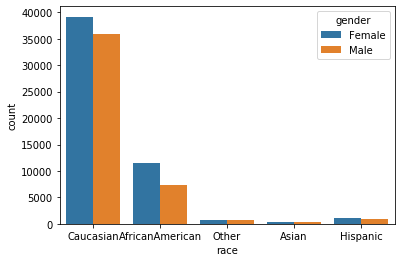

In [38]:
sns.countplot(x="race", hue="gender", data=df)
plt.show()

### Race and age

In [39]:
cross_tab = pd.crosstab(df['race'],df['age'])
cross_tab

age,Seniors,adult,child
race,,,
AfricanAmerican,10143,8589,149
Asian,435,189,1
Caucasian,54020,20707,352
Hispanic,1025,940,19
Other,910,563,10


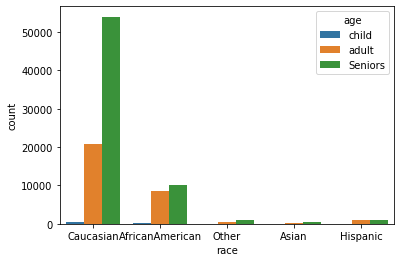

In [40]:
sns.countplot(x="race", hue="age", data=df)
plt.show()

Race and 'diag'

In [41]:
d1 = df[['race','diag_1']]
d1[:3]

,race,diag_1
1,Caucasian,Others
2,AfricanAmerican,Others
3,Caucasian,Others


In [42]:
d2 = df[['race','diag_2']]
d2[:3]

,race,diag_2
1,Caucasian,Diabetes
2,AfricanAmerican,Diabetes
3,Caucasian,Diabetes


In [43]:
d3 = df[['race','diag_3']]
d3[:3]

,race,diag_3
1,Caucasian,Others
2,AfricanAmerican,Others
3,Caucasian,Circulatory


In [44]:
all_dfs = [d1,d2,d3]

# Give all df's common column names
for dfs in all_dfs:
    dfs.columns = ['Race', 'diag']

rd =pd.concat(all_dfs).reset_index(drop=True)

In [45]:
rd[:5]

,Race,diag
0,Caucasian,Others
1,AfricanAmerican,Others
2,Caucasian,Others
3,Caucasian,Neoplasms
4,Caucasian,Circulatory


In [46]:
set(df['race'])

{'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other'}

In [47]:
for i in set(df['race']):
  print(i)
  print('----------')
  print(rd[rd['Race']==i]['diag'].value_counts(True)*100)
  print('--'*20)

Other
----------
Circulatory        27.983817
Others             24.589795
Diabetes           13.351315
Respiratory        11.260958
Genitourinary       7.709598
Digestive           6.473365
Injury              4.068330
Neoplasms           2.292650
Muscoloskeletal     2.270173
Name: diag, dtype: float64
----------------------------------------
Asian
----------
Circulatory        27.093333
Others             24.693333
Diabetes           11.626667
Respiratory         9.173333
Digestive           8.746667
Genitourinary       7.680000
Injury              4.533333
Neoplasms           4.266667
Muscoloskeletal     2.186667
Name: diag, dtype: float64
----------------------------------------
Caucasian
----------
Circulatory        30.927423
Others             24.225150
Diabetes           11.758281
Respiratory        11.250816
Genitourinary       6.619694
Digestive           5.698442
Injury              3.816868
Muscoloskeletal     3.024814
Neoplasms           2.678512
Name: diag, dtype: float64

## Race and 'A1Cresult'

In [48]:
cross_tab = pd.crosstab(df['race'],df['A1Cresult'])
cross_tab

A1Cresult,>7,>8,None,Norm
race,,,,
AfricanAmerican,559,1751,15481,1090
Asian,36,56,496,37
Caucasian,2947,5428,63183,3521
Hispanic,97,251,1515,121
Other,69,145,1184,85


In [49]:
for i in set(df['race']):
  print(i)
  print('----------')
  print(df[df['race']==i]['A1Cresult'].value_counts(True)*100)
  print('--'*20)

Other
----------
None    79.838166
>8       9.777478
Norm     5.731625
>7       4.652731
Name: A1Cresult, dtype: float64
----------------------------------------
Asian
----------
None    79.36
>8       8.96
Norm     5.92
>7       5.76
Name: A1Cresult, dtype: float64
----------------------------------------
Caucasian
----------
None    84.155356
>8       7.229718
Norm     4.689727
>7       3.925199
Name: A1Cresult, dtype: float64
----------------------------------------
AfricanAmerican
----------
None    81.992479
>8       9.273873
Norm     5.772999
>7       2.960648
Name: A1Cresult, dtype: float64
----------------------------------------
Hispanic
----------
None    76.360887
>8      12.651210
Norm     6.098790
>7       4.889113
Name: A1Cresult, dtype: float64
----------------------------------------


In [50]:
df_cat.columns

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'A1Cresult',
       'metformin', 'glipizide', 'insulin', 'change', 'diabetesMed',
       'readmitted'],
      dtype='object')

### Race 'medicins'

In [52]:
df1 = pd.read_csv('diabetic_data.csv')
df1.replace('?',np.nan,inplace=True)
df1.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [53]:
df2=df1[['race','metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone',]]

In [54]:
df2.head()

,race,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
0,Caucasian,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,Caucasian,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No
2,AfricanAmerican,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,Caucasian,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No
4,Caucasian,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No


In [55]:
df2['glipizide'].value_counts()

No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64

In [56]:
df2 = df2.replace({'Steady':'Yes','Up':'Yes','Down':'Yes'})

In [57]:
df2.head()

,race,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
0,Caucasian,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,Caucasian,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No
2,AfricanAmerican,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,Caucasian,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No
4,Caucasian,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No


In [58]:
df2 = df2.replace({'Yes':1,'No':0})
df2.head()

,race,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
0,Caucasian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Caucasian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,AfricanAmerican,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Caucasian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Caucasian,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [59]:
df3 = df2.groupby('race').sum()
df3

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
race,,,,,,,,,,,,,,,,,,,,,,,
AfricanAmerican,3499,178,164,6,813,0,2110,1685,1,1104,1130,21,6,0,7,0,0,11186,108,0,0,0,0
Asian,115,17,10,0,25,0,88,69,0,46,31,2,0,0,0,0,0,308,11,0,0,0,0
Caucasian,15130,1270,492,76,4036,1,9727,8303,21,5772,4867,266,32,3,32,0,0,39499,524,13,1,0,1
Hispanic,481,36,14,2,70,0,260,181,0,159,125,8,0,0,0,0,0,1103,13,0,0,0,0
Other,296,28,16,1,90,0,215,141,0,96,74,5,0,0,0,0,0,901,24,0,0,0,0


In [60]:
s4 =df2.groupby('race').sum().sum(axis=1)
s4

race
AfricanAmerican    22018
Asian                722
Caucasian          90066
Hispanic            2452
Other               1887
dtype: int64

In [61]:
df3.columns

Index(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'],
      dtype='object')

In [62]:
for i in df3.columns:
  print(i)
  print('--------------')
  print(df3[i]*100/s4)
  print('**'*20)

metformin
--------------
race
AfricanAmerican    15.891543
Asian              15.927978
Caucasian          16.798792
Hispanic           19.616639
Other              15.686275
dtype: float64
****************************************
repaglinide
--------------
race
AfricanAmerican    0.808429
Asian              2.354571
Caucasian          1.410077
Hispanic           1.468189
Other              1.483837
dtype: float64
****************************************
nateglinide
--------------
race
AfricanAmerican    0.744845
Asian              1.385042
Caucasian          0.546266
Hispanic           0.570962
Other              0.847907
dtype: float64
****************************************
chlorpropamide
--------------
race
AfricanAmerican    0.027250
Asian              0.000000
Caucasian          0.084383
Hispanic           0.081566
Other              0.052994
dtype: float64
****************************************
glimepiride
--------------
race
AfricanAmerican    3.692433
Asian              3.4

# No

In [63]:
df5 =df2.join(df1['readmitted'])
df_no = df5[df5['readmitted']=='NO'].drop('readmitted',axis=1)
df_no[:4]

,race,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
0,Caucasian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,AfricanAmerican,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Caucasian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Caucasian,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [64]:
df3 = df_no.groupby('race').sum()
df3

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
race,,,,,,,,,,,,,,,,,,,,,,,
AfricanAmerican,2078,80,76,1,459,0,1177,903,1,615,573,10,4,0,7,0,0,5963,56,0,0,0,0
Asian,94,14,8,0,19,0,52,42,0,33,17,2,0,0,0,0,0,191,7,0,0,0,0
Caucasian,8340,555,250,45,2073,0,4819,4450,14,2902,2493,104,10,1,19,0,0,19964,270,5,0,0,1
Hispanic,305,22,11,0,46,0,144,124,0,96,65,2,0,0,0,0,0,626,8,0,0,0,0
Other,201,15,10,1,54,0,126,93,0,46,47,3,0,0,0,0,0,520,11,0,0,0,0


In [65]:
s4 =df3.groupby('race').sum().sum(axis=1)
s4

race
AfricanAmerican    12003
Asian                479
Caucasian          46315
Hispanic            1449
Other               1127
dtype: int64

In [66]:
for i in df3.columns:
  print(i)
  print('--------------')
  print(df3[i]*100/s4)
  print('**'*20)

metformin
--------------
race
AfricanAmerican    17.312339
Asian              19.624217
Caucasian          18.007125
Hispanic           21.048999
Other              17.834960
dtype: float64
****************************************
repaglinide
--------------
race
AfricanAmerican    0.666500
Asian              2.922756
Caucasian          1.198316
Hispanic           1.518288
Other              1.330967
dtype: float64
****************************************
nateglinide
--------------
race
AfricanAmerican    0.633175
Asian              1.670146
Caucasian          0.539782
Hispanic           0.759144
Other              0.887311
dtype: float64
****************************************
chlorpropamide
--------------
race
AfricanAmerican    0.008331
Asian              0.000000
Caucasian          0.097161
Hispanic           0.000000
Other              0.088731
dtype: float64
****************************************
glimepiride
--------------
race
AfricanAmerican    3.824044
Asian              3.9

# Yes

In [67]:
df5 =df2.join(df1['readmitted'])
df_no = df5[df5['readmitted']!='NO'].drop('readmitted',axis=1)
df_no[:4]

,race,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
1,Caucasian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,Caucasian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,Caucasian,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,AfricanAmerican,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [68]:
df3 = df_no.groupby('race').sum()
df3

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
race,,,,,,,,,,,,,,,,,,,,,,,
AfricanAmerican,1421,98,88,5,354,0,933,782,0,489,557,11,2,0,0,0,0,5223,52,0,0,0,0
Asian,21,3,2,0,6,0,36,27,0,13,14,0,0,0,0,0,0,117,4,0,0,0,0
Caucasian,6790,715,242,31,1963,1,4908,3853,7,2870,2374,162,22,2,13,0,0,19535,254,8,1,0,0
Hispanic,176,14,3,2,24,0,116,57,0,63,60,6,0,0,0,0,0,477,5,0,0,0,0
Other,95,13,6,0,36,0,89,48,0,50,27,2,0,0,0,0,0,381,13,0,0,0,0


In [69]:
s4 =df3.groupby('race').sum().sum(axis=1)
s4

race
AfricanAmerican    10015
Asian                243
Caucasian          43751
Hispanic            1003
Other                760
dtype: int64

In [70]:
for i in df3.columns:
  print(i)
  print('--------------')
  print(df3[i]*100/s4)
  print('**'*20)

metformin
--------------
race
AfricanAmerican    14.188717
Asian               8.641975
Caucasian          15.519645
Hispanic           17.547358
Other              12.500000
dtype: float64
****************************************
repaglinide
--------------
race
AfricanAmerican    0.978532
Asian              1.234568
Caucasian          1.634248
Hispanic           1.395813
Other              1.710526
dtype: float64
****************************************
nateglinide
--------------
race
AfricanAmerican    0.878682
Asian              0.823045
Caucasian          0.553130
Hispanic           0.299103
Other              0.789474
dtype: float64
****************************************
chlorpropamide
--------------
race
AfricanAmerican    0.049925
Asian              0.000000
Caucasian          0.070856
Hispanic           0.199402
Other              0.000000
dtype: float64
****************************************
glimepiride
--------------
race
AfricanAmerican    3.534698
Asian              2.4

In [27]:
df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


In [61]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


In [64]:
formula = 'time_in_hospital ~ race'
model = ols(formula,df[['time_in_hospital' , 'race']]).fit()
table = anova_lm(model,typ=1)
table

,df,sum_sq,mean_sq,F,PR(>F)
race,4.0,592.128759,148.032190,16.53475,1.496312e-13
Residual,98047.0,877794.487597,8.952793,NaN,NaN


In [87]:
d = df[['race', 'age']]

In [88]:
d['age']=d['age'].replace({'[0-10)':'child','[10-20)':'child','[20-30)':'adult','[30-40)':'adult','[40-50)':'adult','[50-60)':'adult'
                   ,'[60-70)':'Seniors','[70-80)':'Seniors','[80-90)':'Seniors','[90-100)':'Seniors'})

In [89]:
d.head()

,race,age
1,Caucasian,child
2,AfricanAmerican,adult
3,Caucasian,adult
4,Caucasian,adult
5,Caucasian,adult


In [91]:
dg = d.groupby('race').sum()
dg = dg.reset_index()

In [93]:
dg = dg.sort_values(by = 'age', ascending = False)

In [95]:
plt.figure(figsize = (10,5))
sns.barplot(x = dg['race'],y=dg['age'])

ValueError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 720x360 with 0 Axes>

In [42]:
st.f_oneway(d[d['age']=='Seniors']['num_lab_procedures'],d[d['age']=='adult']['num_lab_procedures'],d[d['age']=='child']['num_lab_procedures'])

F_onewayResult(statistic=6.371580552145928, pvalue=0.0017101630886434285)

In [142]:
d=d[d['readmitted']!='NO']

In [6]:
d['race'].value_counts(True)*100

Caucasian          76.486788
AfricanAmerican    19.307891
Hispanic            2.047380
Other               1.513674
Asian               0.644266
Name: race, dtype: float64

In [138]:
ag

,index,gender
0,Female,54.731142
1,Male,45.268858


In [11]:
ag = pd.DataFrame(d['age'].value_counts(True)*100).reset_index().sort_values(by = 'race', ascending = False)

SyntaxError: positional argument follows keyword argument (<ipython-input-11-46a767e7fcec>, line 1)

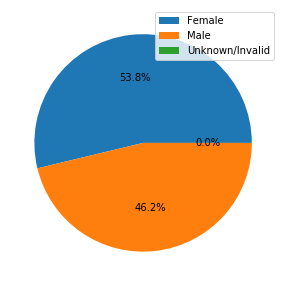

In [140]:

fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)
plt.pie(ag['gender'],autopct=lambda pct: func(pct, ag['gender']))
plt.legend(ag['index'])

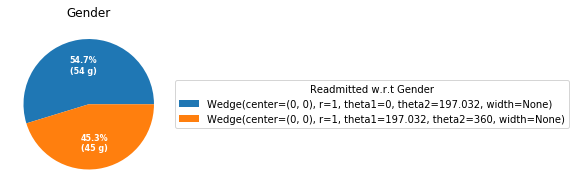

In [125]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%)".format(pct, absolute)




In [96]:
ag['index']=ag['index'].replace({'[0-10)':'child','[10-20)':'child','[20-30)':'adult','[30-40)':'adult','[40-50)':'adult','[50-60)':'adult'
                   ,'[60-70)':'Seniors','[70-80)':'Seniors','[80-90)':'Seniors','[90-100)':'Seniors'})

In [9]:
ag

,index,race
0,Caucasian,76.486788
1,AfricanAmerican,19.307891
2,Hispanic,2.047380
3,Other,1.513674
4,Asian,0.644266


In [12]:
plt.figure(figsize = ( 10,5))
sns.barplot(df['race'], df.race.value_counts(True), df.gender)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 76099

<Figure size 720x360 with 0 Axes>

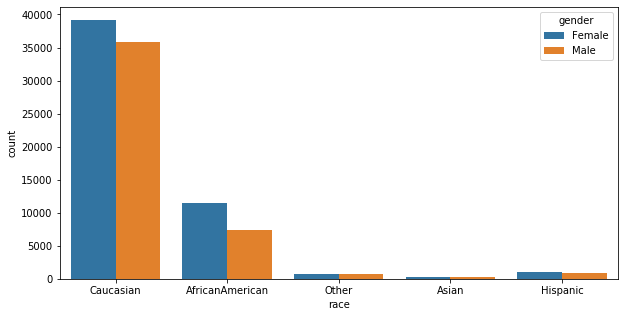

In [26]:
plt.figure(figsize = ( 10,5))
sns.countplot(d['race'], hue = d.gender)